In [16]:
import matplotlib
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure as Figure
import pylab
import sys
import os
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
from skimage.draw import polygon
import json
import matplotlib.image as mpimg
import cv2

#path to COCO images
coco_dir = '../data/mscoco'
dataType = 'train2014'
# annFile='{}/annotations/instances_{}.json'.format(coco_dir,dataType)
annFile = '../masks/similar images/f_f_frisbee_127263_4.json'
cocoImgDir = '{}/images/{}/'.format(coco_dir, dataType)

In [83]:
# initialize COCO api for instance annotations
dataset_type = 'instances'
dataset = json.load(open(annFile, 'r'))

#not sure why this field not saved in my annotations?  But adding it here.
if 'type' not in dataset.keys():
    dataset['type'] = dataset_type
    with open(annFile, 'w') as outfile:
        json.dump(dataset, outfile)

coco=COCO(annFile)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [84]:
# get all images containing given categories, select one at random
# catIds = coco.getCatIds(catNms='person');
# person_id = catIds[0]
# imgIds = coco.getImgIds(catIds=person_id);
# imgId = imgIds[np.random.randint(0,len(imgIds))]
imgId = 1
img = coco.loadImgs(imgId)[0]

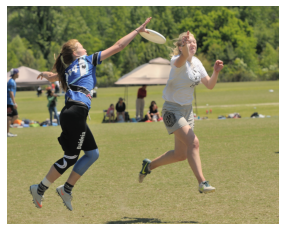

In [95]:
# load and display image
fig = plt.figure(frameon=False)
file = '../images/similar images/f_f_frisbee_127263_4.jpg'
# I=mpimg.imread('%s/COCO_%s_%012d.jpg' %(cocoImgDir, dataType, imgId))
I=mpimg.imread(file)
plt.axis('off')
plt.imshow(I)

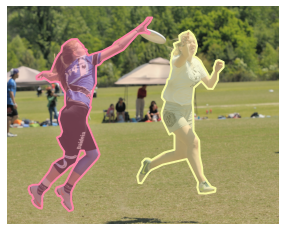

In [86]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [8]:
def get_mask_polygons(anns):
    polygons = []
    for ann in anns:
        for seg in ann['segmentation']:
            poly = np.array(seg).reshape((len(seg)//2, 2))
            polygons.append(Polygon(poly, True,alpha=0.4))
    return polygons    

In [120]:
#get stuff to process image
colors = (0,0,0,1)
color_option = 'average' #other option 'black''
# lines = open('../data/img_names.txt', 'r').readlines()

In [121]:
colors = (0,0,0,1)
color_option = 'average'

masks_dir = '../all masks'
images_dir = '../images/similar images/'
directory = os.fsencode(masks_dir)

for mask in os.listdir(directory):
    annFile= masks_dir + '/' + os.fsdecode(mask)
    print(annFile)
    coco=COCO(annFile)

    save_dir = '../blocked images %s/' %(color_option)
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    image_file = os.path.splitext(os.path.basename(annFile))[0]
    img_filename = images_dir + image_file + '.jpg'
   
    save_file = '%s/%s_%s.png' %(save_dir, image_file, color_option)
    if not os.path.isfile(save_file):

        fig = Figure()
        #canvas = FigureCanvas(fig)
        ax = fig.gca()

        I=mpimg.imread(img_filename)
        # load and display instance annotations
        plt.cla()
        plt.imshow(I); #plt.axis('off')
        annIds = coco.getAnnIds(iscrowd=False)
        anns = coco.loadAnns(annIds)
        polygons = get_mask_polygons(anns)

        #code to make color average of scene
        if color_option == 'average':
            colors = []
            if I.ndim == 2:
                I = np.tile(I[..., np.newaxis], (1, 1, 3))
            for channel in range(3):
                colors.append(np.mean(I[:,:,channel])/255.)
        p = PatchCollection(polygons, facecolors=tuple(colors), edgecolors=tuple(colors), linewidths=10)

        ax = plt.gca()
        ax.add_collection(p)
        ax.set_axis_off()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)


        ax.xaxis.set_major_locator(matplotlib.ticker.NullLocator())
        ax.yaxis.set_major_locator(matplotlib.ticker.NullLocator())

        plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
                    hspace = 0, wspace = 0)

        plt.savefig(save_file, bbox_inches='tight', pad_inches=-0.05)

FileNotFoundError: [Errno 2] No such file or directory: b'../all masks'

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


FileNotFoundError: [Errno 2] No such file or directory: '../images/other/f_f_sports_192670_1.jpg'

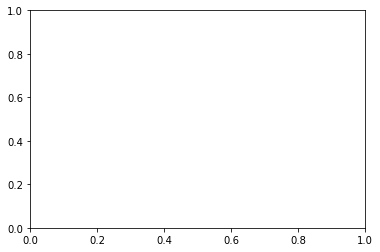

In [12]:
colors = (0,0,0,1)
color_option = 'average'

masks_file = '../masks/other images masks.json'
coco=COCO(masks_file)
annImgIds = coco.getImgIds()
imgs = coco.loadImgs(annImgIds)

annIds = coco.getAnnIds(iscrowd=False)
anns = coco.loadAnns(annIds)
images_dir = '../images/other/'

anns_dict = {}

for ann in anns:
    ann_img_id = ann['image_id']
    img = imgs[ann_img_id - 1]
    
    img_id = img['id']
    img_filename = images_dir + img['file_name']
    
    ann_list = anns_dict.get(ann_img_id)
    if ann_list is None:
        anns_dict[ann_img_id] = [ann]
    else:
        ann_list.append(ann)

ann_img_id = 85
# for ann_img_id in anns_dict:
img = imgs[ann_img_id - 1]

img_id = img['id']
img_filename = images_dir + img['file_name']

save_dir = '../images/other images blocked (%s)/' %(color_option)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

image_file = os.path.splitext(os.path.basename(img['file_name']))[0]

save_file = '%s/%s_%s.jpeg' %(save_dir, image_file, color_option)
if not os.path.isfile(save_file):

    fig = Figure()
    #canvas = FigureCanvas(fig)
    ax = fig.gca()

    I=mpimg.imread(img_filename)
#     I = np.rot90(I)
    # load and display instance annotations
    plt.cla()
    plt.imshow(I); #plt.axis('off')
    polygons = get_mask_polygons(anns_dict[ann_img_id])

    #code to make color average of scene
    if color_option == 'average':
        colors = []
        if I.ndim == 2:
            I = np.tile(I[..., np.newaxis], (1, 1, 3))
        for channel in range(3):
            colors.append(np.mean(I[:,:,channel])/255.)
    p = PatchCollection(polygons, facecolors=tuple(colors), edgecolors=tuple(colors), linewidths=10)

    ax = plt.gca()
    ax.add_collection(p)
    ax.set_axis_off()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    ax.xaxis.set_major_locator(matplotlib.ticker.NullLocator())
    ax.yaxis.set_major_locator(matplotlib.ticker.NullLocator())

    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
                hspace = 0, wspace = 0)

    plt.savefig(save_file, bbox_inches='tight', pad_inches=-0.05)

In [18]:
mask_dir = '../images/other images (original size)/other images blocked (average)/'
save_dir = '../images/other images (original size)/blocked/'
for ann in anns:
    ann_img_id = ann['image_id']
    img = imgs[ann_img_id - 1]
    width = img['width']
    height = img['height']
    image_file = os.path.splitext(os.path.basename(img['file_name']))[0]

    img_filename = mask_dir + image_file + '_average.png'
    img_arr = cv2.imread(img_filename)
    save_file = '%s/%s_%s.png' %(save_dir, image_file, 'blocked')
    output = cv2.resize(img_arr, (width, height))
    cv2.imwrite(save_file, output)
    

In [91]:
def get_segmentation_polygons(anns, catIds, W, H):
    polygons = []
    for ann in anns:
        if ann['category_id'] in catIds:
            # polygon            
            for seg in ann['segmentation']:
                poly = []
                num_points = len(seg) // 2
                for i in xrange(num_points):
                    x, y = seg[2 * i], seg[2 * i + 1]
                    assert(x<=W)
                    assert(y<=H)
                    poly.append((min(x,W-1), min(y,H-1)))
                poly = np.array(poly)
                polygons.append(poly)                
    return polygons

In [9]:
def save_person_segmentations(coco, cocoImgDir, coco_masks, img_path):    
    catIds = coco.getCatIds(catNms='person');
    person_id = catIds[0]

    lines = open(img_path, 'r').readlines()
    imgIds = [int(line) for line in lines]
    imgIds = list(set(imgIds) & set(coco.getImgIds()))

    for i, imgId in enumerate(imgIds):
        sys.stdout.write('\r%d/%d' %(i, len(imgIds)))
        img = coco.loadImgs(imgId)[0]
        save_file = '%s/COCO_%s_%012d.npy' %(coco_masks, dataType, img['id'])
        if not os.path.isfile(save_file):
            #fig = plt.figure(frameon=False)
            #ax = fig.gca()
            I=mpimg.imread('%s/COCO_%s_%012d.jpg' %(cocoImgDir, dataType, imgId))
            #plt.cla()
            H, W = I.shape[0:2]
            annIds = coco.getAnnIds(imgIds=img['id'], iscrowd=False)
            anns = coco.loadAnns(annIds)
            polygons = get_segmentation_polygons(anns, [person_id], W, H)      
            seg_map = np.zeros(I.shape[:2])
            for poly in polygons:
                rr, cc = polygon(poly[:, 0], poly[:, 1])
                seg_map[cc, rr] = 1
            #plt.imshow(seg_map)
            #plt.show()
            np.save(save_file, seg_map)
    print ('done')

In [10]:
dataType = 'val2014'
annFile='{}/annotations/instances_{}.json'.format(coco_dir,dataType)
cocoImgDir = '{}/images/{}/'.format(coco_dir, dataType)
coco_masks = '{}/masks/{}/'.format(coco_dir, dataType)
coco=COCO(annFile)

if not os.path.isdir(coco_masks):
    os.makedirs(coco_masks)
    
save_person_segmentations(coco, cocoImgDir, coco_masks, '../data/balanced_split/val_woman.txt')
save_person_segmentations(coco, cocoImgDir, coco_masks, '../data/balanced_split/val_man.txt')
save_person_segmentations(coco, cocoImgDir, coco_masks, '../data/balanced_split/test_woman.txt')
save_person_segmentations(coco, cocoImgDir, coco_masks, '../data/balanced_split/test_man.txt')

loading annotations into memory...


FileNotFoundError: [Errno 2] No such file or directory: '../data/mscoco/annotations/instances_val2014.json'